# 부정맥 (잘못된 리듬) on 심전도 분류 모델링

**INTRODUCTION**

심전도에서의 부정맥을 예측하고자 합니다.   
우리는 두 개의 서로 다른 데이터 세트가 있지만,   

mitbih. MIT-BIH 부정맥 데이터베이스에는 1975년과 1979년 사이에 BIH 부정맥 연구소에서 연구한 47명의 피험자로부터 얻은 2채널 보행 심전도 기록의 48시간 30분 발췌본이 포함되어 있습니다.  

  
보스턴의 베스 이스라엘 병원의 입원 환자(약 60%)와 외래 환자(약 40%)의 혼합 인구로부터 수집된 4000개의 24시간 보행 심전도 기록 세트에서 23개의 기록이 무작위로 선택되었다. 


데이터 수: 47명의 피험간  
측정 방식: 2채널 ECG  
데이터 형식: 4000개  

    
나머지 25개의 기록은 임상적으로 유의한 부정맥을 포함하기 위해 동일한 세트에서 선택. 
  
출처: https://physionet.org/content/mitdb/1.0.0/



48 half-hour excerpts of two-channel ambulatory ECG recordings,  
obtained from 47 subjects studied by the BIH Arrhythmia Laboratory between 1975 and 1979.  

Twenty-three recordings were chosen at random from a set of 4000 24-hour ambulatory ECG recordings collected 
from a mixed population of inpatients (about 60%) and outpatients (about 40%) 

at Boston's Beth Israel Hospital; 

the remaining 25 recordings were selected from the same set 

Arrhythmia Dataset

    Number of Samples: 109446
    Number of Categories: 5
    Sampling Frequency: 125Hz
    Data Source: Physionet's MIT-BIH Arrhythmia Dataset
    Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

-N : Normal 비트(정상 비트)
-S : 초심실외박동
-V : 심실외박동
-F : 퓨전 비트
-Q : 알 수없는 비트

-N : Non-ecotic beats (normal beat)
-S : Supraventricular ectopic beats
-V : Ventricular ectopic beats
-F : Fusion Beats
-Q : Unknown Beats

**What is an ecg? **

심전도(ECG)는 심장의 박동과 전기 활동을 확인하는 데 사용될 수 있는 간단한 검사이다.

피부에 부착된 센서는 심장이 뛸 때마다 발생하는 전기 신호를 감지하는 데 사용됩니다.

이 신호들은 기계에 의해 기록되고 의사는 그것들이 특이한지 보기 위해 살펴봅니다.

심전도 검사는 심장 전문의(심장 전문의) 또는 GP를 포함하여 심장에 문제가 있을 수 있다고 생각하는 의사가 요청할 수 있습니다. 이것이 우리가 분석할 이 테스트의 결과입니다.

An electrocardiogram (ECG) may be requested by a heart specialist (cardiologist) or any doctor who thinks you might have a problem with your heart, including your GP.

**Load Data**

In [93]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [94]:
path_root = '/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih'

!cd /content/gdrive/MyDrive/proj/ecg/kaggle-mitbih

import os
type(os.listdir())

list

In [95]:
# os를 불러오고 os에서 걸어다니며 가져올 대상은 (path_root)
# filenames 확인
path_dirfile_all = []
import os
for dirname, _, filenames in os.walk(path_root):
    for filename in filenames:
        path_dirfile_all.append(os.path.join(dirname, filename))
        print(path_dirfile_all)
        #i += 1
filenames

['/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/ptbdb_normal.csv']
['/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/ptbdb_normal.csv', '/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/ptbdb_abnormal.csv']
['/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/ptbdb_normal.csv', '/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/ptbdb_abnormal.csv', '/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/mitbih_test.csv']
['/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/ptbdb_normal.csv', '/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/ptbdb_abnormal.csv', '/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/mitbih_test.csv', '/content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/mitbih_train.csv']


['ptbdb_normal.csv',
 'ptbdb_abnormal.csv',
 'mitbih_test.csv',
 'mitbih_train.csv']

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [97]:
# path 전체에 대하여 idx_path가 for문으로 관찰읽어오기
# 만약 파일명에 'train'이 있으면 train_df에 읽어오기
# 또, 만약 파일명에 'test'가 있으면 test_df에 읽어오기

In [98]:
for idx_path in range(len(path_dirfile_all)):
  if 'train' in path_dirfile_all[idx_path]:
    train_df=pd.read_csv(path_dirfile_all[idx_path],header=None)
    print('path_dirfile_all[idx_path]', path_dirfile_all[idx_path])
  elif 'test' in path_dirfile_all[idx_path]:
    test_df=pd.read_csv(path_dirfile_all[idx_path],header=None)

path_dirfile_all[idx_path] /content/gdrive/MyDrive/proj/ecg/kaggle-mitbih/mitbih_train.csv


**Balance of dataset**

In [99]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [100]:
# train_df[187]은 레이블입니다. 0-4 

# 레이블을 int형으로 타입을 변경하여 다시 원래 자리에 넣어주세요
# equilibre에 각 레이블의 값_숫자를 세어 기록해주세요

In [101]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [102]:
# circle pie 그리기

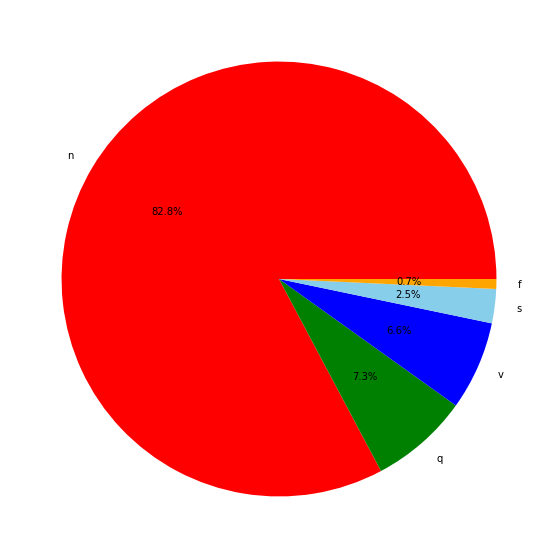

In [103]:
plt.figure(figsize=(20,10))
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
plt.show()

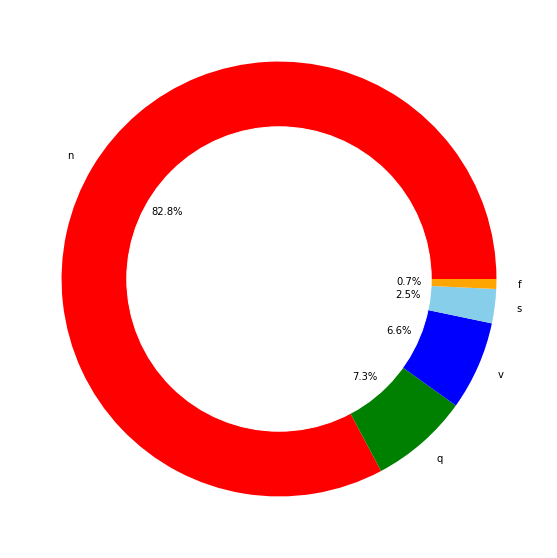

In [104]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.show()

클래스 가중치보다 리샘플 기법을 선택하기로 결정
decided to choose the resample technique

In [105]:
# train_df[187]==0 인 인덱스에 대하여 샘플링을 n=20000, random_state=상수 (레이블마다 다르게) 진행
# 나머지 부족한 레이블에 대해서도, n=20000이 되도록 리샘플링 (= 숫자가 부족했으니, 추가되도록 업샘플링이라는 주머니 이름)

In [106]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [107]:
equilibre=train_df[187].value_counts()
print(equilibre)


0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


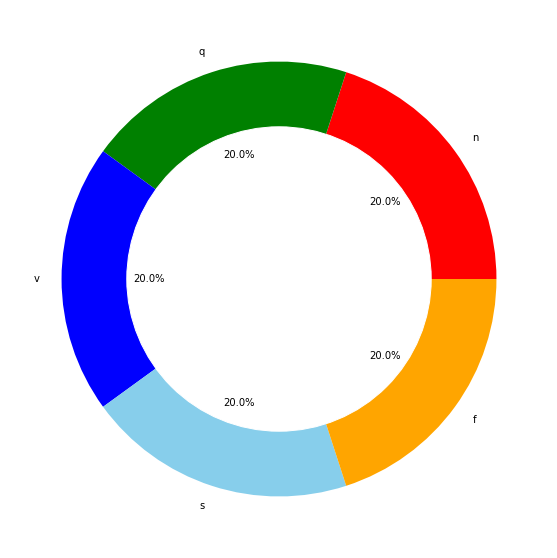

In [108]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Resample works perfectly we can go on. 

**Classes**

In [109]:
# sample(1)으로 샘플하나 관찰하기
# class 약자인 c로 데이터 하나 체크
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1)) 
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
22599,0.021212,0.133333,0.290909,0.445455,0.527273,0.630303,0.733333,0.760606,0.763636,0.775758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74624,0.978947,0.792105,0.050000,0.000000,0.100000,0.076316,0.073684,0.065789,0.055263,0.063158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
79891,0.000000,0.001335,0.057410,0.156208,0.242991,0.291055,0.376502,0.448598,0.483311,0.543391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81027,1.000000,0.858653,0.446499,0.052840,0.000000,0.137384,0.219287,0.229855,0.215324,0.208719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
81155,1.000000,0.713092,0.596100,0.479109,0.362117,0.284123,0.231198,0.211699,0.172702,0.164345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


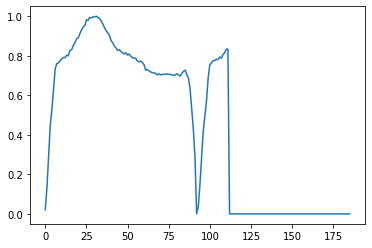

In [110]:
plt.plot(c.iloc[0,:186])

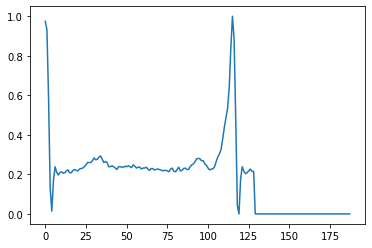

In [111]:
class_number_tmp = 0
img=train_df.loc[train_df[187]==class_number_tmp].values

plt.plot(img[2])

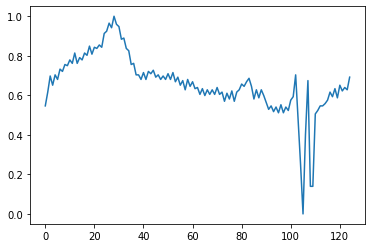

In [112]:
min_ = 5
size = 130
img_tmp=img[0,min_: size]

plt.plot(img_tmp)

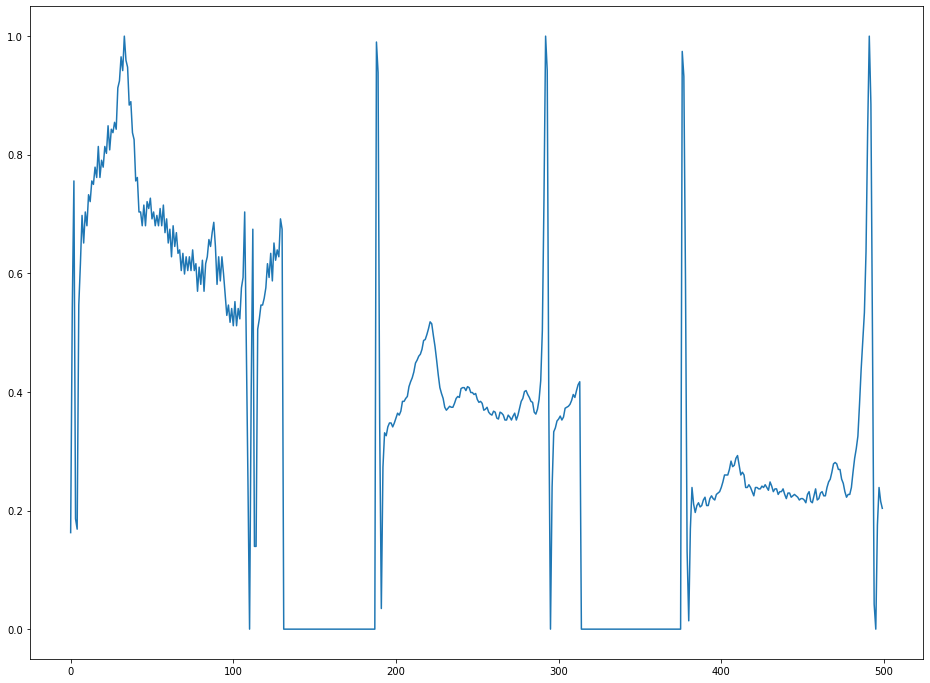

In [113]:
img_flatten=img.flatten()
plt.figure(figsize=(16,12))
plt.plot(img_flatten[:500])
plt.show()

In [114]:
# hist를 통해서 여러개 신호를 겹쳐서 살펴보겠습니다! size = plot 할 신호의 길이

class_number, np.shape(img) 0 (20000, 65)
final1 before concat (65,)
final1 after concat (1300000,)
np.shape(img_flat만들기) (1300000,)


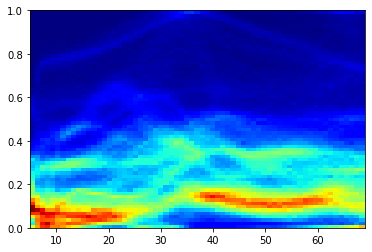

In [115]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size] # 5에서 70까지라, 65가 되기도함
    print('class_number, np.shape(img)', class_number, np.shape(img))

    # todo: hist2d에 들어갈 한데이터인 '이미지의 flatten' 모습
    img_flatten=img.flatten() # img flatten이라면 몇 by 몇 일까요?

    final1=np.arange(min_,size)
    print('final1 before concat', np.shape(final1))
    for i in range (img.shape[0]-1): # 행, 즉 모든 데이터에 대해 점검하겠다는 뜻 y축 만들기
      tempo1=np.arange(min_,size)
      final1=np.concatenate((final1, tempo1), axis=None)
    print('final1 after concat', np.shape(final1))

    #print(len(final1))   
    print('np.shape(img_flat만들기)', np.shape(img_flatten))

    # todo: hist2d에 대해 확인하고 적용해보겠습니다.
    # x의 값은 첫 번째 차원을 따라 히스토그램 화되고 y의 값은 두 번째 차원을 따라 히스토그램화됩니다.
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

plot_hist(0,70,5,65) # 클래스번호, 사이즈, 최소값, x축 (time) 몇개씩 나눠서 볼까요

각 클래스별 신호 모양 차이를 한번 체크해보겠습니다!

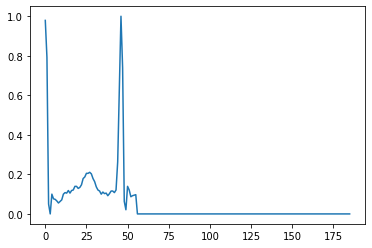

In [116]:
plt.plot(c.iloc[1,:186])

class_number, np.shape(img) 1 (20000, 45)
final1 before concat (45,)
final1 after concat (900000,)
np.shape(img_flat만들기) (900000,)


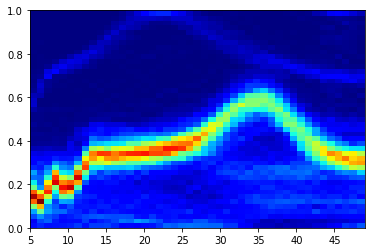

In [117]:
plot_hist(1,50,5,45)

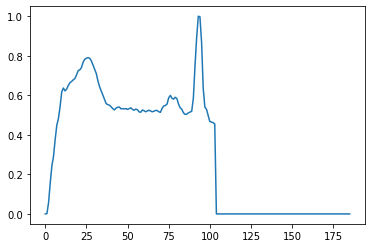

In [118]:
plt.plot(c.iloc[2,:186])

class_number, np.shape(img) 2 (20000, 45)
final1 before concat (45,)
final1 after concat (900000,)
np.shape(img_flat만들기) (900000,)


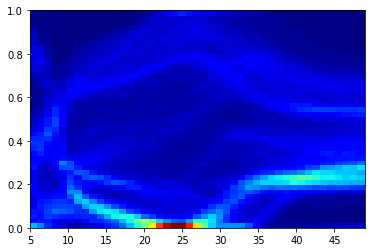

In [119]:
plot_hist(2,50,5,45)

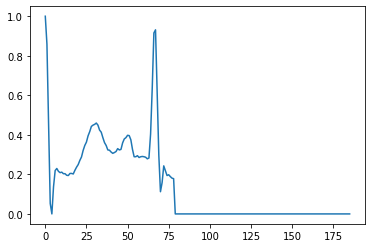

In [120]:
plt.plot(c.iloc[3,:186])

class_number, np.shape(img) 3 (20000, 45)
final1 before concat (45,)
final1 after concat (900000,)
np.shape(img_flat만들기) (900000,)


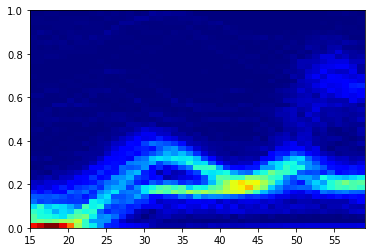

In [121]:
plot_hist(3,60,15,45)

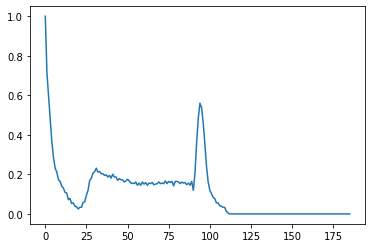

In [122]:
plt.plot(c.iloc[4,:186])

class_number, np.shape(img) 4 (20000, 35)
final1 before concat (35,)
final1 after concat (700000,)
np.shape(img_flat만들기) (700000,)


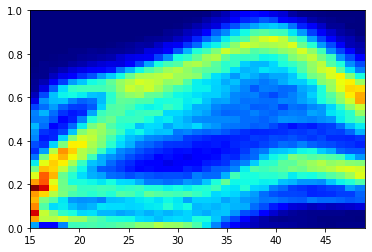

In [123]:
plot_hist(4,50,15,35)

**Pretreat**

train 데이터에 Noise 더하여 일반화 능력 향상하고자 합니다

In [124]:
# add_gaussian_noise 함수를 만듭니다. noise 정의 평균 0, 표준편차 0.5, 신호 배열크기 186으로 정하고 신호에 더함
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.1,186) 
    return (signal+noise)

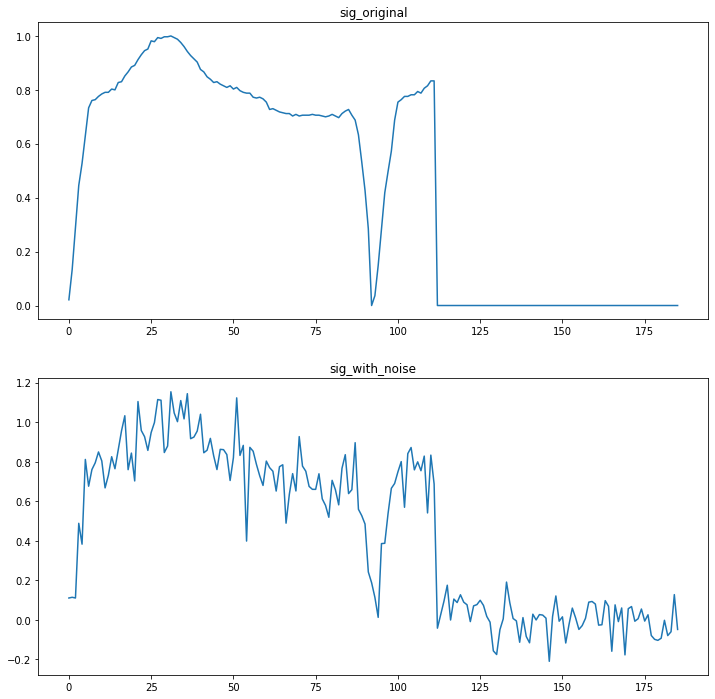

In [125]:
tempo = c.iloc[0, :186]  # c에서 iloc으로 신호 배열크기 186으로 정합니다 
bruiter=add_gaussian_noise(tempo) # 신호에 노이즈를 더합니다

plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.plot(tempo)
plt.title('sig_original')

plt.subplot(2,1,2)
plt.plot(bruiter)
plt.title('sig_with_noise')

plt.show()

In [126]:
#todo: target_train, target_test
# one hot 으로 변경합니다 (-> categorical)

In [127]:
target_train = train_df[187]
target_test = test_df[187]

y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

print('y_train', y_train)

y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [128]:
#todo: .values로 X_train과 X_test 정의
#  .values를 쓰지 않았을 때의 type과 비교해보세요

In [129]:
X_train_tmp=train_df.iloc[:,:186]
type(X_train_tmp)

pandas.core.frame.DataFrame

In [130]:
X_train_tmp=train_df.iloc[:,:186].values
type(X_train_tmp)

numpy.ndarray

In [131]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])


In [132]:
#todo: X_train과 X_test는 reshape이 필요, 컬러관련 차원 하나 추가합니다! 

In [133]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**Network**

In [134]:
#todo: X_train,y_train,X_test,y_test를 입력 인자로 받아서 network 함수로 layer를 만들어봅니다
# conv1_1 = 1D CNN ( 필터수 64, (6), relu 함수, input_shape은 im_shape로 )
# conv1_1 = Batch 노멀라이제이션
# pool1 = MaxPool1D(pool_size=(3), strides=(2), 제로패딩으로 배열크기가 same이 되도록)

# conv1_1 -> conv2_1 -> conv3_1 
# -> pool3 -> flatten -> dense_end1 (노드수 64) -> dense_end2 (노드수 32) -> main_output (노드수 5)

In [148]:
def network(X_train,y_train,X_test,y_test):
    
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1= Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1= BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1= Dense(64, activation='relu')(flatten)
    dense_end2= Dense(32, activation='relu')(dense_end1)
    main_output= Dense(5, activation='softmax', name='main_output')(dense_end2)

    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return (model, history)

In [142]:
#todo: = 뒤에 빈칸과, 'o'를 채워주세요

In [143]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]

    #todo y_test의 element 중 최고값의 인덱스를 y_true에 append해주세요
    for element in y_test:
      y_true.append(np.argmax(element))

    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [150]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history= network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 106s 34ms/step - loss: 0.3191 - accuracy: 0.8828 - val_loss: 0.2845 - val_accuracy: 0.9009
Epoch 2/40
3125/3125 [==============================] - 101s 32ms/step - loss: 0.1857 - accuracy: 0.9319 - val_loss: 0.2951 - val_accuracy: 0.8937
Epoch 3/40
3125/3125 [==============================] - 99s 32ms/step - loss: 0.1460 - accuracy: 0.9470 - val_loss: 0.2656 - val_accuracy: 0.9033
Epoch 4/40
3125/3125 [==============================] - 99s 32ms/step - loss: 0.1239 - accuracy: 0.9545 - val_loss: 0.2208 - val_accuracy: 0.9178
Epoch 5/40
3125/3125 [==============================] - 101s 32ms/step - loss: 0.1052 - accuracy: 0.9614 - val_loss: 0.2025 - val_accuracy: 0.9320
Epoch 6/40
3125/3125 [==============================] - 103s 33ms/step - loss: 0.0914 - accuracy: 0.9663 - val_loss: 0.2087 - val_accuracy: 0.9305
Epoch 7/40
3125/3125 [==============================] - 100s 32ms/step - loss: 0.0828 - accuracy: 0.9699 - val_loss: 0.2

Accuracy: 93.20%


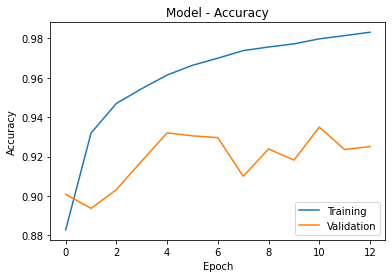

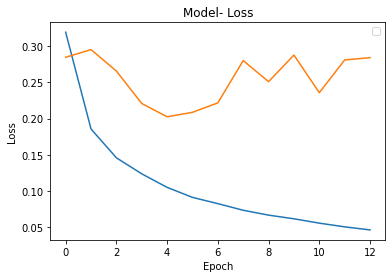

In [151]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

from : https://www.kaggle.com/coni57/model-from-arxiv-1805-00794

Normalized confusion matrix


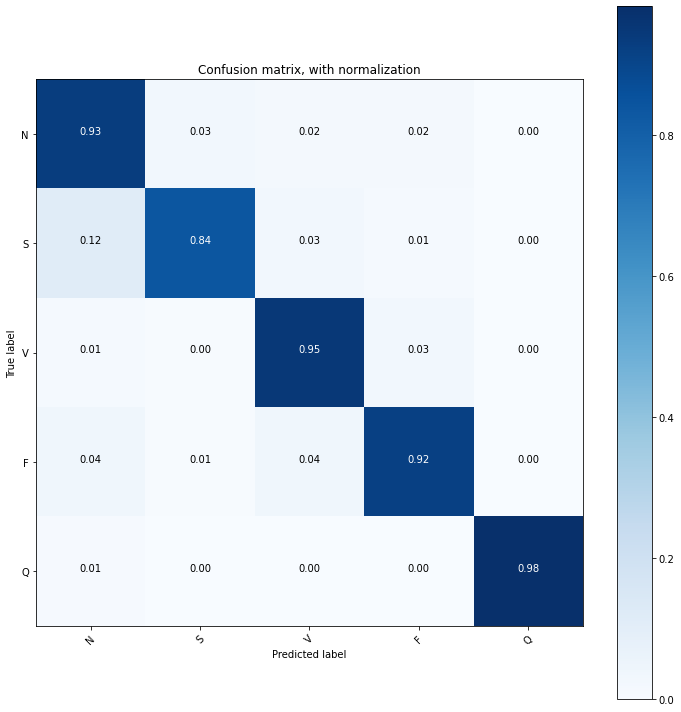

In [152]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#todo 테스트 최대값의 인덱스 y_test.argmax(axis=?), y_pred.argmax(axis=?)
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()



fin